In [1]:
# regular imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import env

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

# Wrangling
from sklearn.model_selection import train_test_split

# Acquire and Summarize

In [13]:

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
sql_query = '''
SELECT prop. *,
predictions_2017.logerror,
predictions_2017.transactiondate,
air.airconditioningdesc,
arch.architecturalstyledesc,
build.buildingclassdesc,
heat.heatingorsystemdesc,
land.propertylandusedesc,
story.storydesc,
type.typeconstructiondesc
FROM properties_2017 prop
JOIN (
            SELECT parcelid, MAX(transactiondate) AS max_transactiondate
            FROM predictions_2017
            GROUP BY parcelid) pred USING(parcelid)
JOIN predictions_2017 ON pred.parcelid = predictions_2017.parcelid
AND pred.max_transactiondate = predictions_2017.transactiondate
LEFT JOIN airconditioningtype air USING(airconditioningtypeid)
LEFT JOIN architecturalstyletype arch USING(architecturalstyletypeid)
LEFT JOIN buildingclasstype build USING(buildingclasstypeid)
LEFT JOIN heatingorsystemtype heat USING(heatingorsystemtypeid)
LEFT JOIN propertylandusetype land USING(propertylandusetypeid)
LEFT JOIN storytype story USING(storytypeid)
LEFT JOIN typeconstructiontype type USING(typeconstructiontypeid)
WHERE propertylandusedesc IN ('Single Family Residential' , 'Mobile Home', 'Manufactured, Modular, Prefabricated Homes', 'Patio Home', 'Bungalow', 'Planned Unit Development') 
AND transactiondate <= '2017-12-31'
AND prop.longitude IS NOT NULL
AND prop.latitude IS NOT NULL;
'''
    
def get_zillow_data():
    df = pd.read_sql(sql_query, get_connection('zillow'))
    df = df.drop(columns='id')
    return df

In [24]:
df = get_zillow_data()
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,NaN,3.50,4.00,None,NaN,3.50,NaN,NaN,"3,100.00","3,100.00",NaN,None,NaN,NaN,"6,059.00",NaN,3.00,2.00,633.00,NaN,NaN,"33,634,931.00","-117,869,207.00","4,506.00",NaN,NaN,NaN,NaN,NaN,122,261.00,None,"60,590,630.07","53,571.00","1,286.00",NaN,"96,978.00",0.00,NaN,1.00,NaN,NaN,NaN,NaN,"1,998.00",NaN,NaN,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72",None,NaN,"60,590,630,072,012.00",0.03,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,17052889,NaN,NaN,NaN,1.00,2.00,None,NaN,1.00,NaN,"1,465.00","1,465.00","1,465.00",NaN,None,"1,465.00",NaN,"6,111.00",1.00,1.00,1.00,0.00,NaN,NaN,"34,449,266.00","-119,281,531.00","12,647.00",NaN,NaN,NaN,NaN,NaN,1110,261.00,None,"61,110,010.02","13,091.00","2,061.00",NaN,"97,099.00",5.00,NaN,NaN,NaN,NaN,NaN,NaN,"1,967.00",1.00,NaN,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48",None,NaN,"61,110,010,023,006.00",0.06,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,14186244,NaN,NaN,NaN,2.00,3.00,None,NaN,2.00,NaN,NaN,"1,243.00","1,243.00",NaN,None,NaN,NaN,"6,059.00",NaN,2.00,2.00,440.00,NaN,NaN,"33,886,168.00","-117,823,170.00","8,432.00",1.00,NaN,NaN,NaN,1.00,122,261.00,None,"60,590,218.02","21,412.00","1,286.00",NaN,"97,078.00",6.00,NaN,NaN,NaN,NaN,NaN,NaN,"1,962.00",1.00,NaN,"85,289.00","564,778.00","2,016.00","479,489.00","6,488.30",None,NaN,"60,590,218,022,012.00",0.01,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,12177905,NaN,NaN,NaN,3.00,4.00,None,8.00,3.00,NaN,NaN,"2,376.00","2,376.00",NaN,None,NaN,NaN,"6,037.00",NaN,3.00,NaN,NaN,NaN,2.00,"34,245,180.00","-118,240,722.00","13,038.00",1.00,NaN,NaN,NaN,1.00,0101,261.00,LCR110000*,"60,373,001.00","396,551.00","3,101.00",NaN,"96,330.00",0.00,NaN,NaN,NaN,1.00,NaN,NaN,"1,970.00",NaN,NaN,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51",None,NaN,"60,373,001,001,006.00",-0.10,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,12095076,1.00,NaN,NaN,3.00,4.00,None,9.00,3.00,NaN,NaN,"2,962.00","2,962.00",NaN,None,NaN,NaN,"6,037.00",NaN,3.00,NaN,NaN,NaN,2.00,"34,145,202.00","-118,179,824.00","63,000.00",1.00,NaN,NaN,NaN,1.00,0101,261.00,PSR2,"60,374,608.00","47,019.00","3,101.00","274,684.00","96,293.00",0.00,NaN,NaN,NaN,1.00,NaN,NaN,"1,950.00",NaN,NaN,"276,684.00","773,303.00","2,016.00","496,619.00","9,516.26",None,NaN,"60,374,608,001,014.00",-0.00,2017-01-01,Central,None,None,Central,Single Family Residential,None,None


In [37]:
df.fireplacecnt.value_counts()

1.00    6025
2.00     942
3.00     229
4.00      35
5.00       3
Name: fireplacecnt, dtype: int64

In [38]:
df[df['fireplacecnt'] == 5]

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
909,17292548,NaN,NaN,NaN,6.00,5.00,None,NaN,6.00,66.00,"5,010.00","9,311.00","9,311.00",NaN,None,"5,010.00",NaN,"6,111.00",5.00,6.00,4.00,891.00,NaN,NaN,"34,137,131.00","-118,876,955.00","37,013.00",1.00,800.00,NaN,NaN,1.00,1110,261.00,None,"61,110,073.00","41,673.00","2,061.00",NaN,"96,384.00",11.00,NaN,NaN,NaN,NaN,440.00,NaN,"2,004.00",2.00,NaN,"1,443,012.00","5,368,861.00","2,016.00","3,925,849.00","56,983.74",None,NaN,"61,110,073,001,065.00",0.23,2017-01-06,None,None,None,None,Single Family Residential,None,None
11676,17125373,NaN,NaN,NaN,7.00,6.00,None,NaN,7.00,NaN,"4,276.00","7,770.00","7,770.00",NaN,None,"8,880.00",NaN,"6,111.00",5.00,7.00,2.00,561.00,NaN,NaN,"34,249,863.00","-119,081,740.00","46,980.00",1.00,750.00,NaN,NaN,1.00,1110,261.00,None,"61,110,052.05","51,239.00","2,061.00",NaN,"97,089.00",13.00,NaN,NaN,NaN,NaN,"1,027.00",21.00,"2,004.00",2.00,NaN,"1,188,005.00","1,636,139.00","2,016.00","448,134.00","18,354.54",None,NaN,"61,110,052,051,013.00",0.04,2017-03-14,None,None,None,None,Single Family Residential,None,None
15982,17290534,NaN,NaN,NaN,7.50,5.00,None,NaN,7.50,NaN,"6,116.00","6,620.00","6,620.00",NaN,None,"6,116.00",NaN,"6,111.00",5.00,7.00,3.00,741.00,NaN,NaN,"34,193,693.00","-118,813,260.00","21,075.00",NaN,NaN,NaN,NaN,NaN,1110,261.00,None,"61,110,074.02","34,278.00","2,061.00",NaN,"96,385.00",9.00,NaN,1.00,NaN,NaN,NaN,NaN,"1,982.00",2.00,NaN,"610,222.00","940,060.00","2,016.00","329,838.00","10,075.90",None,NaN,"61,110,074,021,016.00",-0.02,2017-04-03,None,None,None,None,Single Family Residential,None,None


In [ ]:
df["poolcnt"].fillna(0, inplace = True)
df["pooltypeid7"].fillna(0, inplace = True)



In [32]:
df[df['poolcnt'] != 1]

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,NaN,3.50,4.00,None,NaN,3.50,NaN,NaN,"3,100.00","3,100.00",NaN,None,NaN,NaN,"6,059.00",NaN,3.00,2.00,633.00,NaN,NaN,"33,634,931.00","-117,869,207.00","4,506.00",NaN,NaN,NaN,NaN,NaN,122,261.00,None,"60,590,630.07","53,571.00","1,286.00",NaN,"96,978.00",0.00,NaN,1.00,NaN,NaN,NaN,NaN,"1,998.00",NaN,NaN,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72",None,NaN,"60,590,630,072,012.00",0.03,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,17052889,NaN,NaN,NaN,1.00,2.00,None,NaN,1.00,NaN,"1,465.00","1,465.00","1,465.00",NaN,None,"1,465.00",NaN,"6,111.00",1.00,1.00,1.00,0.00,NaN,NaN,"34,449,266.00","-119,281,531.00","12,647.00",NaN,NaN,NaN,NaN,NaN,1110,261.00,None,"61,110,010.02","13,091.00","2,061.00",NaN,"97,099.00",5.00,NaN,NaN,NaN,NaN,NaN,NaN,"1,967.00",1.00,NaN,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48",None,NaN,"61,110,010,023,006.00",0.06,2017-01-01,None,None,None,None,Single Family Residential,None,None
5,12069064,NaN,NaN,NaN,1.00,2.00,None,5.00,1.00,NaN,NaN,738.00,738.00,NaN,None,NaN,NaN,"6,037.00",NaN,1.00,NaN,NaN,NaN,NaN,"34,149,214.00","-118,239,357.00","4,214.00",NaN,NaN,NaN,NaN,NaN,0100,261.00,GLR4YY,"60,373,020.04","45,457.00","3,101.00","276,258.00","96,325.00",0.00,NaN,NaN,NaN,1.00,NaN,NaN,"1,922.00",NaN,NaN,"18,890.00","218,552.00","2,016.00","199,662.00","2,366.08",None,NaN,"60,373,020,041,001.00",0.10,2017-01-01,None,None,None,None,Single Family Residential,None,None
6,12790562,NaN,NaN,NaN,3.00,4.00,None,9.00,3.00,NaN,NaN,"3,039.00","3,039.00",NaN,None,NaN,NaN,"6,037.00",NaN,3.00,NaN,NaN,NaN,2.00,"33,960,230.00","-118,006,914.00","20,028.00",NaN,NaN,NaN,NaN,NaN,0100,261.00,WHRE20000*,"60,375,002.02","14,634.00","3,101.00",NaN,"96,173.00",0.00,NaN,NaN,NaN,1.00,NaN,NaN,"1,970.00",NaN,NaN,"177,527.00","220,583.00","2,016.00","43,056.00","3,104.19",None,NaN,"60,375,002,024,006.00",-0.04,2017-01-02,None,None,None,Central,Single Family Residential,None,None
8,13944538,13.00,NaN,NaN,2.50,3.00,None,NaN,2.50,NaN,NaN,"1,340.00","1,340.00",NaN,None,NaN,NaN,"6,059.00",1.00,2.00,2.00,420.00,NaN,NaN,"33,771,438.00","-117,982,834.00","1,199.00",NaN,NaN,NaN,NaN,NaN,122,261.00,None,"60,590,888.01","24,832.00","1,286.00",NaN,"97,051.00",6.00,NaN,1.00,NaN,NaN,NaN,NaN,"1,980.00",2.00,NaN,"96,617.00","319,668.00","2,016.00","223,051.00","4,078.08",None,NaN,"60,590,888,014,006.00",0.05,2017-01-02,Yes,None,None,None,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54390,12412492,NaN,NaN,NaN,2.00,4.00,None,6.00,2.00,NaN,NaN,"1,633.00","1,633.00",NaN,None,NaN,NaN,"6,037.00",NaN,2.00,NaN,NaN,NaN,2.00,"33,870,815.00","-11

Summarize your data

In [4]:
#Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"54,395.00","12,968,798.63","3,495,113.43","10,711,855.00","11,481,340.50","12,540,352.00","14,105,468.00","167,689,317.00"
airconditioningtypeid,"15,320.00",2.28,3.66,1.00,1.00,1.00,1.00,13.00
architecturalstyletypeid,70.00,7.10,2.67,2.00,7.00,7.00,7.00,21.00
basementsqft,47.00,678.98,711.83,38.00,263.50,512.00,809.50,"3,560.00"
bathroomcnt,"54,395.00",2.32,1.02,0.00,2.00,2.00,3.00,18.00
bedroomcnt,"54,395.00",3.30,0.95,0.00,3.00,3.00,4.00,14.00
buildingqualitytypeid,"35,647.00",6.35,1.72,1.00,5.00,6.00,8.00,12.00
calculatedbathnbr,"54,221.00",2.33,1.02,1.00,2.00,2.00,3.00,18.00
decktypeid,392.00,66.00,0.00,66.00,66.00,66.00,66.00,66.00
finishedfloor1squarefeet,"4,381.00","1,546.23",674.94,184.00,"1,151.00","1,410.00","1,760.00","6,912.00"


In [5]:
#Info on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54395 entries, 0 to 54394
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      54395 non-null  int64  
 1   airconditioningtypeid         15320 non-null  float64
 2   architecturalstyletypeid      70 non-null     float64
 3   basementsqft                  47 non-null     float64
 4   bathroomcnt                   54395 non-null  float64
 5   bedroomcnt                    54395 non-null  float64
 6   buildingclasstypeid           0 non-null      object 
 7   buildingqualitytypeid         35647 non-null  float64
 8   calculatedbathnbr             54221 non-null  float64
 9   decktypeid                    392 non-null    float64
 10  finishedfloor1squarefeet      4381 non-null   float64
 11  calculatedfinishedsquarefeet  54291 non-null  float64
 12  finishedsquarefeet12          54085 non-null  float64
 13  f

In [6]:
#Shape of the dataframe
df.shape

(54395, 67)

(-1.0, 1.0)

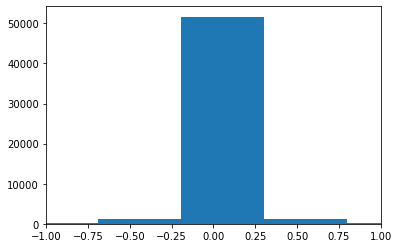

In [7]:
#Distribution of target variable
plt.hist(x=df['logerror'], bins=20)
plt.xlim(-1, 1)

In [8]:
df.storytypeid.value_counts()

7.00    47
Name: storytypeid, dtype: int64

In [9]:
df.unitcnt.value_counts()

1.00    35723
2.00       27
3.00        1
Name: unitcnt, dtype: int64

In [35]:
df[df['numberofstories'] == 6]

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
40759,14376294,NaN,NaN,NaN,2.00,4.00,None,NaN,2.00,NaN,NaN,"1,207.00","1,207.00",NaN,None,NaN,NaN,"6,059.00",NaN,2.00,2.00,483.00,NaN,NaN,"33,614,838.00","-117,697,707.00","7,826.00",NaN,NaN,NaN,NaN,NaN,122,261.00,None,"60,590,320.14","32,380.00","1,286.00",NaN,"96,962.00",4.00,NaN,NaN,NaN,NaN,NaN,NaN,"1,964.00",6.00,NaN,"66,266.00","293,358.00","2,016.00","227,092.00","2,969.28",None,NaN,"60,590,320,141,023.00",-0.03,2017-07-18,None,None,None,None,Single Family Residential,None,None


Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [10]:
#Define function to calculate number and percent of values missing from each column
def null_counter(df):
    
    new_columns = ['name', 'num_rows_missing', 'pct_rows_missing']
    
    new_df = pd.DataFrame(columns=new_columns)
    
    for col in list(df.columns):
        num_missing = df[col].isna().sum()
        pct_missing = num_missing / df.shape[0]
        
        add_df = pd.DataFrame([{'name': col, 'num_rows_missing': num_missing,
                               'pct_rows_missing': pct_missing}])
        
        new_df = pd.concat([new_df, add_df], axis=0)
        
    new_df.set_index('name', inplace=True)
    
    return new_df

In [12]:
null_df = null_counter(df)

null_df

,num_rows_missing,pct_rows_missing
name,,
parcelid,0,0.00
airconditioningtypeid,39075,0.72
architecturalstyletypeid,54325,1.00
basementsqft,54348,1.00
bathroomcnt,0,0.00
...,...,...
buildingclassdesc,54395,1.00
heatingorsystemdesc,18611,0.34
propertylandusedesc,0,0.00


# Prepare

Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [34]:
df.numberofstories.value_counts()

1.00    8878
2.00    5312
3.00     351
6.00       1
Name: numberofstories, dtype: int64

In [19]:


df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
3,12177905,NaN,NaN,NaN,3.00,4.00,None,8.00,3.00,NaN,NaN,"2,376.00","2,376.00",NaN,None,NaN,NaN,"6,037.00",NaN,3.00,NaN,NaN,NaN,2.00,"34,245,180.00","-118,240,722.00","13,038.00",1.00,NaN,NaN,NaN,1.00,0101,261.00,LCR110000*,"60,373,001.00","396,551.00","3,101.00",NaN,"96,330.00",0.00,NaN,NaN,NaN,1.00,NaN,NaN,"1,970.00",NaN,NaN,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51",None,NaN,"60,373,001,001,006.00",-0.10,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,12095076,1.00,NaN,NaN,3.00,4.00,None,9.00,3.00,NaN,NaN,"2,962.00","2,962.00",NaN,None,NaN,NaN,"6,037.00",NaN,3.00,NaN,NaN,NaN,2.00,"34,145,202.00","-118,179,824.00","63,000.00",1.00,NaN,NaN,NaN,1.00,0101,261.00,PSR2,"60,374,608.00","47,019.00","3,101.00","274,684.00","96,293.00",0.00,NaN,NaN,NaN,1.00,NaN,NaN,"1,950.00",NaN,NaN,"276,684.00","773,303.00","2,016.00","496,619.00","9,516.26",None,NaN,"60,374,608,001,014.00",-0.00,2017-01-01,Central,None,None,Central,Single Family Residential,None,None
5,12069064,NaN,NaN,NaN,1.00,2.00,None,5.00,1.00,NaN,NaN,738.00,738.00,NaN,None,NaN,NaN,"6,037.00",NaN,1.00,NaN,NaN,NaN,NaN,"34,149,214.00","-118,239,357.00","4,214.00",NaN,NaN,NaN,NaN,NaN,0100,261.00,GLR4YY,"60,373,020.04","45,457.00","3,101.00","276,258.00","96,325.00",0.00,NaN,NaN,NaN,1.00,NaN,NaN,"1,922.00",NaN,NaN,"18,890.00","218,552.00","2,016.00","199,662.00","2,366.08",None,NaN,"60,373,020,041,001.00",0.10,2017-01-01,None,None,None,None,Single Family Residential,None,None
6,12790562,NaN,NaN,NaN,3.00,4.00,None,9.00,3.00,NaN,NaN,"3,039.00","3,039.00",NaN,None,NaN,NaN,"6,037.00",NaN,3.00,NaN,NaN,NaN,2.00,"33,960,230.00","-118,006,914.00","20,028.00",NaN,NaN,NaN,NaN,NaN,0100,261.00,WHRE20000*,"60,375,002.02","14,634.00","3,101.00",NaN,"96,173.00",0.00,NaN,NaN,NaN,1.00,NaN,NaN,"1,970.00",NaN,NaN,"177,527.00","220,583.00","2,016.00","43,056.00","3,104.19",None,NaN,"60,375,002,024,006.00",-0.04,2017-01-02,None,None,None,Central,Single Family Residential,None,None
7,11104527,1.00,NaN,NaN,3.00,4.00,None,8.00,3.00,NaN,NaN,"2,540.00","2,540.00",NaN,None,NaN,NaN,"6,037.00",NaN,3.00,NaN,NaN,NaN,2.00,"34,434,971.00","-118,464,390.00","10,384.00",1.00,NaN,NaN,NaN,1.00,0101,261.00,SCUR2,"60,379,200.34","54,311.00","3,101.00","37,739.00","96,374.00",0.00,NaN,NaN,NaN,1.00,NaN,NaN,"1,999.00",NaN,NaN,"271,715.00","430,108.00","2,016.00","158,393.00","6,103.36",None,NaN,"60,379,200,341,014.00",0.01,2017-01-02,Central,None,None,Central,Single Family Residential,None,None


In [23]:
df.shape

(35723, 33)

Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    - A dataframe

    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).

    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

- The output:

    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.



- hint:

    - Look up the dropna documentation.
    
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [20]:
#Define function to drop columns/rows based on proportion of nulls
def null_dropper(df, prop_required_column, prop_required_row):
    
    prop_null_column = 1 - prop_required_column
    
    for col in list(df.columns):
        
        null_sum = df[col].isna().sum()
        null_pct = null_sum / df.shape[0]
        
        if null_pct > prop_null_column:
            df.drop(columns=col, inplace=True)
            
    row_threshold = int(prop_required_row * df.shape[1])
    
    df.dropna(axis=0, thresh=row_threshold, inplace=True)
    
    return df

In [21]:

clean_df = null_dropper(df, 0.75, 0.75)

clean_df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
3,12177905,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,2.00,"34,245,180.00","-118,240,722.00","13,038.00",0101,261.00,LCR110000*,"60,373,001.00","396,551.00","3,101.00","96,330.00",0.00,1.00,"1,970.00","108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,Central,Single Family Residential
4,12095076,3.00,4.00,9.00,3.00,"2,962.00","2,962.00","6,037.00",3.00,2.00,"34,145,202.00","-118,179,824.00","63,000.00",0101,261.00,PSR2,"60,374,608.00","47,019.00","3,101.00","96,293.00",0.00,1.00,"1,950.00","276,684.00","773,303.00","2,016.00","496,619.00","9,516.26","60,374,608,001,014.00",-0.00,2017-01-01,Central,Single Family Residential
5,12069064,1.00,2.00,5.00,1.00,738.00,738.00,"6,037.00",1.00,NaN,"34,149,214.00","-118,239,357.00","4,214.00",0100,261.00,GLR4YY,"60,373,020.04","45,457.00","3,101.00","96,325.00",0.00,1.00,"1,922.00","18,890.00","218,552.00","2,016.00","199,662.00","2,366.08","60,373,020,041,001.00",0.10,2017-01-01,None,Single Family Residential
6,12790562,3.00,4.00,9.00,3.00,"3,039.00","3,039.00","6,037.00",3.00,2.00,"33,960,230.00","-118,006,914.00","20,028.00",0100,261.00,WHRE20000*,"60,375,002.02","14,634.00","3,101.00","96,173.00",0.00,1.00,"1,970.00","177,527.00","220,583.00","2,016.00","43,056.00","3,104.19","60,375,002,024,006.00",-0.04,2017-01-02,Central,Single Family Residential
7,11104527,3.00,4.00,8.00,3.00,"2,540.00","2,540.00","6,037.00",3.00,2.00,"34,434,971.00","-118,464,390.00","10,384.00",0101,261.00,SCUR2,"60,379,200.34","54,311.00","3,101.00","96,374.00",0.00,1.00,"1,999.00","271,715.00","430,108.00","2,016.00","158,393.00","6,103.36","60,379,200,341,014.00",0.01,2017-01-02,Central,Single Family Residential


In [22]:
clean_df.shape

(35723, 33)